# Predict the Stock Price Using Moving Average Strategy

### Features

1. Date
2. Open Price - Opening price of the stock on that date
3. High Price - highest price of the stock on that date
4. Low Price - lowest price of the stock on that date
5. Close Price - closing price of the stock on that date
6. Adj Close Price - closing price of the stock after considering corporate actions like dividends, stock splits etc..
7. Volume - total no of shares traded in a specified time period

### Strategy

This strategy gives the buy and sell signals based on moving averages.

Buy Signal - When the shorter-term Moving Average crosses above the longer-term Moving Average

Sell Signal - when the shorter-term Moving Average crosses below the longer-term Moving Average

### Preparing the tools

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Load Data

In [5]:
df=pd.read_csv("AAPL.csv")
df.head()

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
0,5/27/2014,87.982857,89.408569,87.947144,89.375717,80.948952,87216500
1,5/28/2014,89.431427,89.975716,89.111427,89.144287,80.739334,78870400
2,5/29/2014,89.692856,90.981430,89.681427,90.768570,82.210480,94118500
3,5/30/2014,91.139999,92.024284,89.842857,90.428574,81.902557,141005200
4,6/2/2014,90.565712,90.690002,88.928574,89.807144,81.339699,92337700


In [6]:
df.tail()

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
1505,5/18/2020,313.170013,316.500000,310.320007,314.959991,314.959991,33843100
1506,5/19/2020,315.029999,318.519989,313.010010,313.140015,313.140015,25432400
1507,5/20/2020,316.679993,319.519989,316.519989,319.230011,319.230011,27876200
1508,5/21/2020,318.660004,320.890015,315.869995,316.850006,316.850006,25672200
1509,5/22/2020,315.769989,319.230011,315.350006,318.890015,318.890015,20430600


In [7]:
df.shape

(1510, 7)

In [8]:
df.describe()

,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,157.978552,159.539694,156.544346,158.115756,152.312201,3.838967e+07
std,56.184602,57.034062,55.603048,56.412547,58.609623,1.950338e+07
min,87.982857,89.408569,87.947144,89.144287,80.739334,1.136200e+07
25%,111.967497,112.857502,110.614999,112.017502,104.381134,2.515898e+07
50%,145.315002,146.720001,144.325005,145.780006,139.728653,3.339445e+07
75%,189.650001,191.377503,187.724998,190.017494,185.526695,4.646998e+07
max,324.739990,327.850006,323.350006,327.200012,326.316681,1.898463e+08


In [9]:
df.isnull().sum()

Date               0
Open Price         0
High Price         0
Low Price          0
Close Price        0
Adj Close Price    0
Volume             0
dtype: int64

### Visualization

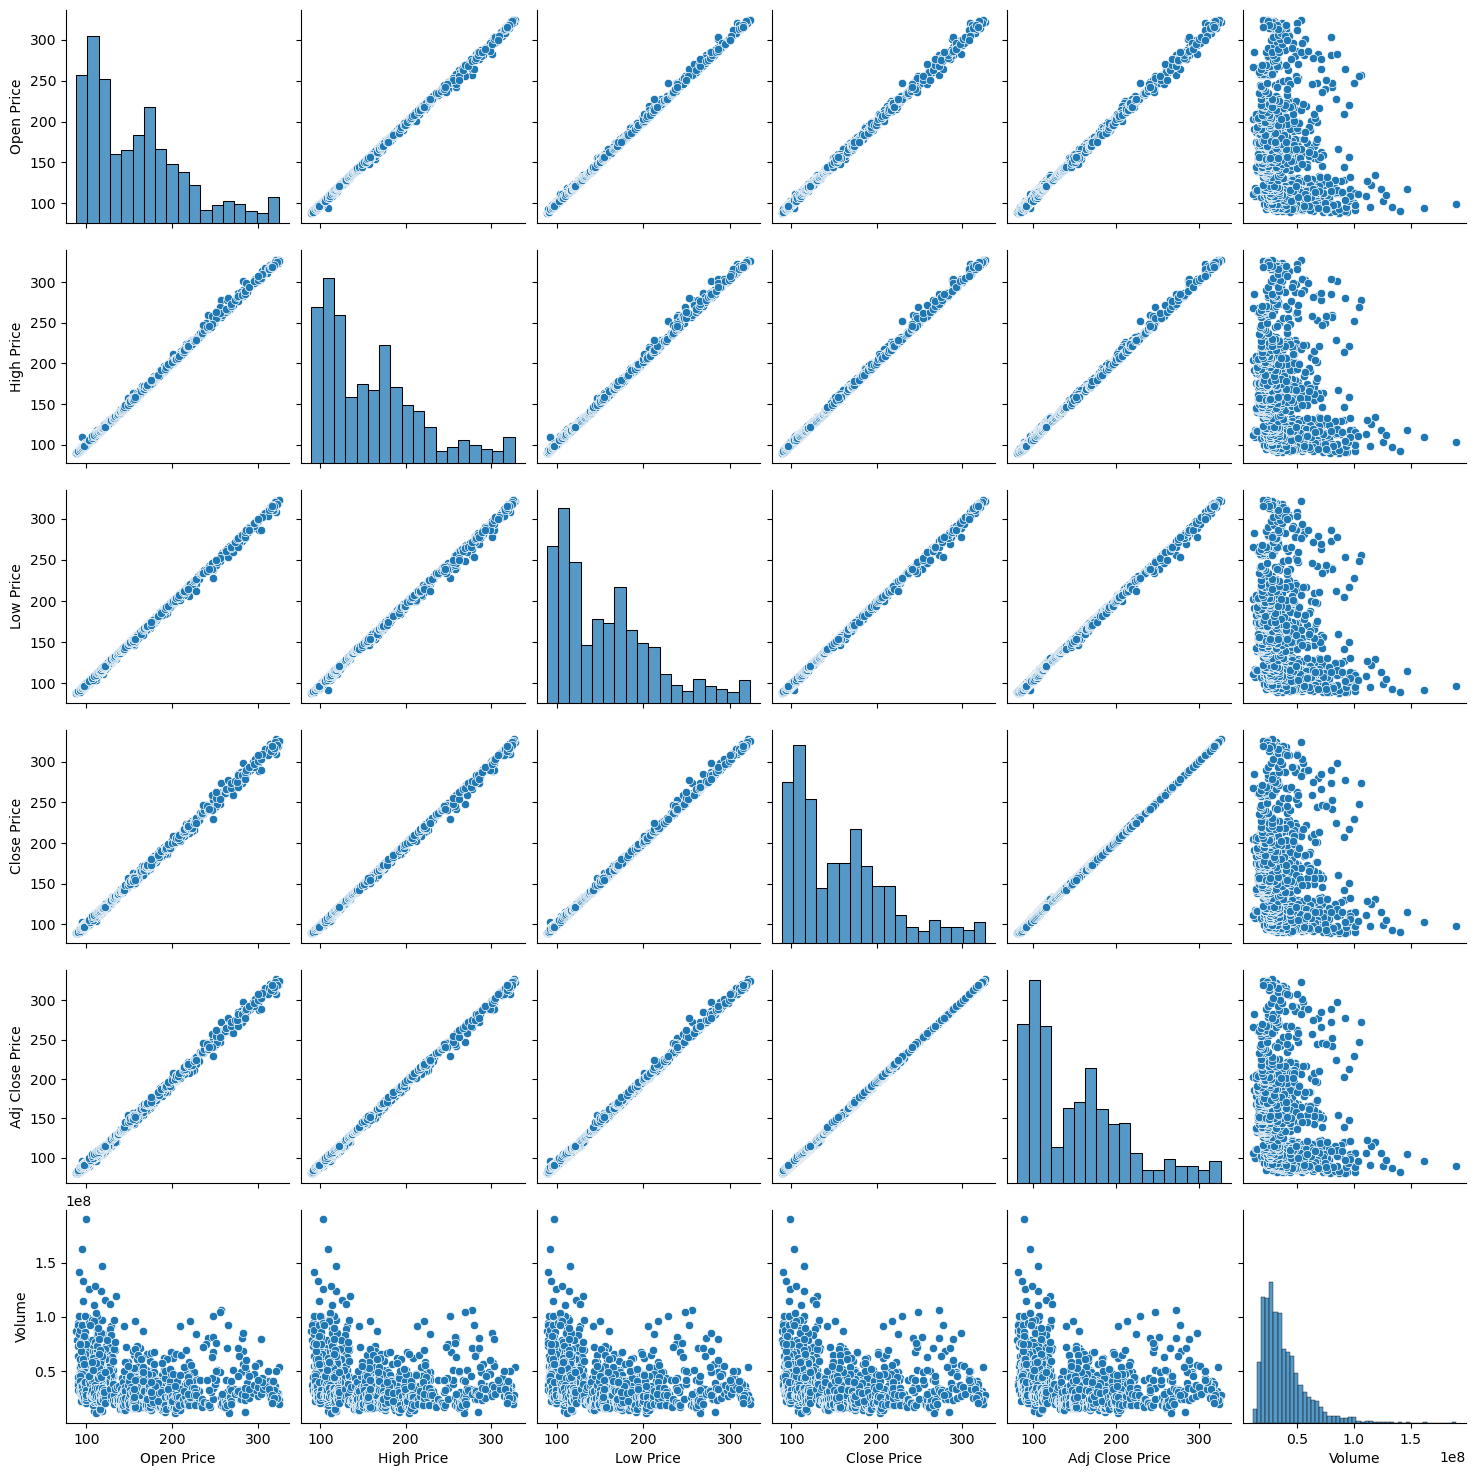

In [10]:
sns.pairplot(df)

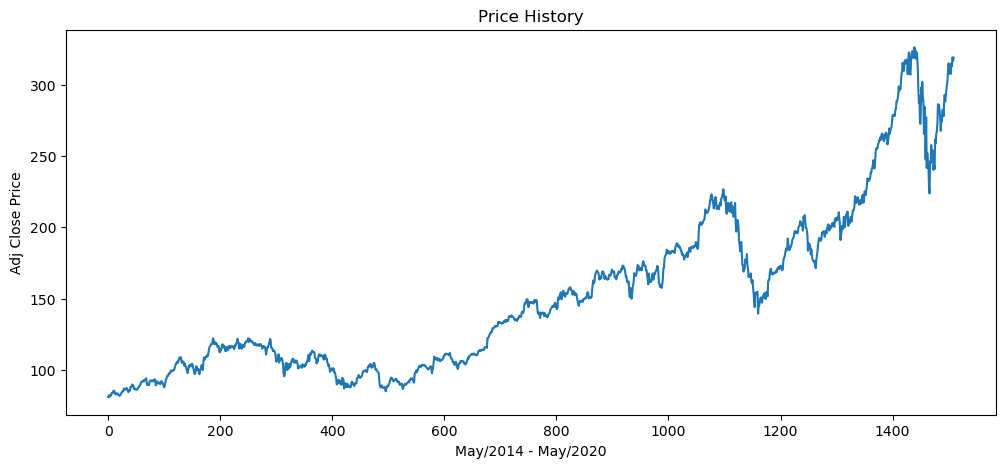

In [15]:
plt.figure(figsize=(12,5))
plt.plot(df['Adj Close Price'])
plt.title('Price History')
plt.xlabel('May/2014 - May/2020')
plt.ylabel('Adj Close Price')
plt.show()

### Strategy:

In [16]:
mv30=pd.DataFrame()


In [19]:
mv30["Adj Close Price"]=df["Adj Close Price"].rolling(window=30).mean()
mv30

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1505,287.864806
1506,289.577426
1507,291.594106
1508,293.310716


In [20]:
mv100=pd.DataFrame()

In [22]:
mv100["Adj Close Price"]=df["Adj Close Price"].rolling(window=100).mean()
mv100

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1505,289.734840
1506,290.037927
1507,290.345799
1508,290.630966


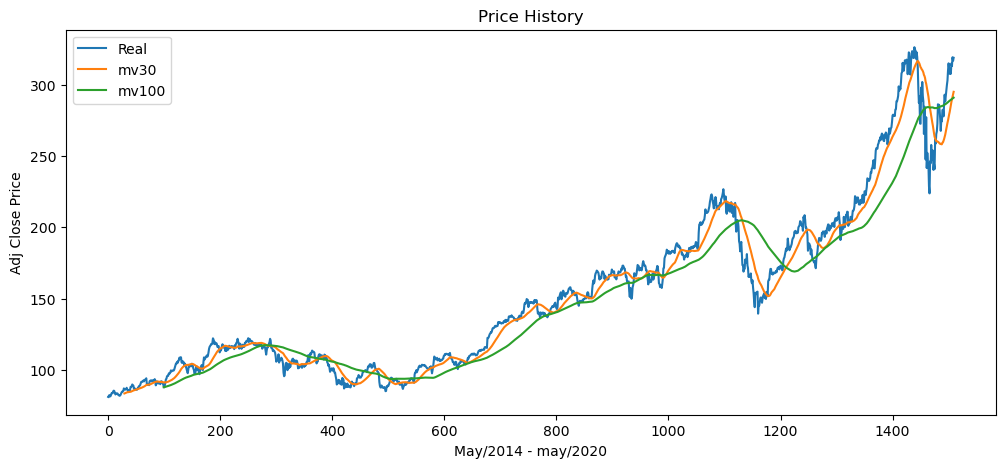

In [23]:
plt.figure(figsize=(12,5))
plt.plot(df['Adj Close Price'], label='Real')
plt.plot(mv30['Adj Close Price'], label='mv30')
plt.plot(mv100['Adj Close Price'], label='mv100')
plt.title('Price History')
plt.xlabel('May/2014 - may/2020')
plt.ylabel('Adj Close Price')
plt.legend(loc='upper left')
plt.show()

In [24]:
df1=pd.DataFrame()
df1['Real']=df['Adj Close Price']
df1['Mv30']=mv30['Adj Close Price']
df1['Mv100']=mv100['Adj Close Price']

In [25]:
df1

,Real,Mv30,Mv100
0,80.948952,NaN,NaN
1,80.739334,NaN,NaN
2,82.210480,NaN,NaN
3,81.902557,NaN,NaN
4,81.339699,NaN,NaN
...,...,...,...
1505,314.959991,287.864806,289.734840
1506,313.140015,289.577426,290.037927
1507,319.230011,291.594106,290.345799
1508,316.850006,293.310716,290.630966


### Implementation

In [26]:
def predict(df1):
    buy,sell=[],[]
    i=-1
    for j in range(len(df1)):
        if df1['Mv30'][j]>df1['Mv100'][j]:
            if i!=1:
                buy.append(df1['Real'][j])
                sell.append(np.nan)
                i=1
            else:
                buy.append(np.nan)
                sell.append(np.nan)
        elif df1['Mv30'][j]<df1['Mv100'][j]:
            if i!=0:
                sell.append(df1['Real'][j])
                buy.append(np.nan)
                i=0
            else:
                sell.append(np.nan)
                buy.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
    return(buy,sell)

In [27]:
result=predict(df1)


In [28]:
df1["Buy Price"]=result[0]
df1["Sell Price"]=result[1]

In [30]:
df1

,Real,Mv30,Mv100,Buy Price,Sell Price
0,80.948952,NaN,NaN,NaN,NaN
1,80.739334,NaN,NaN,NaN,NaN
2,82.210480,NaN,NaN,NaN,NaN
3,81.902557,NaN,NaN,NaN,NaN
4,81.339699,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1505,314.959991,287.864806,289.734840,NaN,NaN
1506,313.140015,289.577426,290.037927,NaN,NaN
1507,319.230011,291.594106,290.345799,319.230011,NaN
1508,316.850006,293.310716,290.630966,NaN,NaN


### Visualization of Strategy

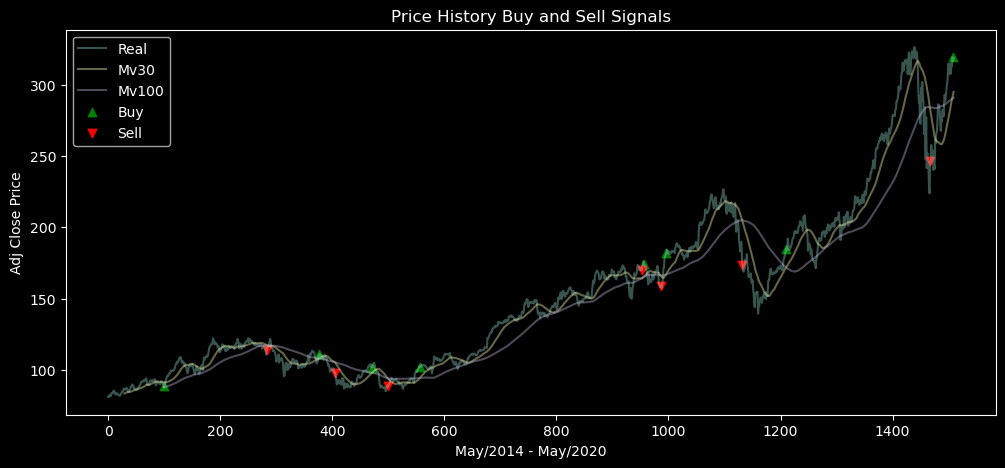

In [32]:
plt.style.use('dark_background')
plt.figure(figsize=(12,5))
plt.plot(df1['Real'], label='Real', alpha=0.4)
plt.plot(df1['Mv30'], label='Mv30', alpha=0.4)
plt.plot(df1['Mv100'], label='Mv100', alpha=0.4)
plt.scatter(df1.index, df1['Buy Price'], label ='Buy', marker='^',color='green')
plt.scatter(df1.index, df1['Sell Price'],label='Sell', marker='v', color='red')
plt.title('Price History Buy and Sell Signals')
plt.xlabel("May/2014 - May/2020")
plt.ylabel("Adj Close Price")
plt.legend(loc='upper left')
plt.show()